In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import json
import sys
import matplotlib.pyplot as plt
from timeit import default_timer as timer

In [2]:
ds = '3'

In [3]:
# ds = input('Which dataset do you want to run on? Enter 1 for \'Raw\', 2 for \'EMNIST\' \
# or 3 for \'Chars74K')

In [4]:
i = 0

while i == 0:
    if ds == '1':
        directory = "../input/yaromnist-dataset/Raw Handwritten Roman Numerals Dataset"
        user_data = directory + "/train"
        valid_data = directory + "/val"
        test_data = directory + "/test" # this can be the label book, or any other test set you create
        i = 1
    elif ds == '2':
        directory = "../input/emnistbased-handwritten-roman-numerals/500_each_EMNIST-based-Roman"
        user_data = directory + "/train"
        valid_data = directory + "/val"
        test_data = directory + "/test" # this can be the label book, or any other test set you create
        i = 1
    elif ds == '3':
        directory = "../input/basedonenglishhandwrittencharactersmodified/Based-Chars74K-image-dataset-Roman"
        user_data = directory + "/train"
        valid_data = directory + "/val"
        test_data = directory + "/test" # this can be the label book, or any other test set you create
        i = 1
    else: ds = input('Sorry, try again!')
        

In [5]:
### DO NOT MODIFY BELOW THIS LINE, THIS IS THE FIXED MODEL ###
batch_size = 8
tf.random.set_seed(123)


if __name__ == "__main__":
    train = tf.keras.preprocessing.image_dataset_from_directory(
        user_data,
        labels="inferred",
        label_mode="categorical",
        class_names=["i", "ii", "iii", "iv", "v", "vi", "vii", "viii", "ix", "x"],
        shuffle=True,
        seed=123,
        batch_size=batch_size,
        image_size=(32, 32),
    )

    valid = tf.keras.preprocessing.image_dataset_from_directory(
        valid_data,
        labels="inferred",
        label_mode="categorical",
        class_names=["i", "ii", "iii", "iv", "v", "vi", "vii", "viii", "ix", "x"],
        shuffle=True,
        seed=123,
        batch_size=batch_size,
        image_size=(32, 32),
    )

    total_length = ((train.cardinality() + valid.cardinality()) * batch_size).numpy()
    if total_length > 10_000:
        print(f"Dataset size larger than 10,000. Got {total_length} examples")
        sys.exit()

    test = tf.keras.preprocessing.image_dataset_from_directory(
        test_data,
        labels="inferred",
        label_mode="categorical",
        class_names=["i", "ii", "iii", "iv", "v", "vi", "vii", "viii", "ix", "x"],
        shuffle=False,
        seed=123,
        batch_size=batch_size,
        image_size=(32, 32),
    )
    
    start = timer() # Not in original code

    base_model = tf.keras.applications.ResNet50(
        input_shape=(32, 32, 3),
        include_top=False,
        weights=None,
    )
    base_model = tf.keras.Model(
        base_model.inputs, outputs=[base_model.get_layer("conv2_block3_out").output]
    )

    inputs = tf.keras.Input(shape=(32, 32, 3))
    x = tf.keras.applications.resnet.preprocess_input(inputs)
    x = base_model(x)
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Dense(10)(x)
    model = tf.keras.Model(inputs, x)

    model.compile(
        optimizer=tf.keras.optimizers.Adam(lr=0.0001),
        loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
        metrics=["accuracy"],
    )
    model.summary()
    loss_0, acc_0 = model.evaluate(valid)
    print(f"loss {loss_0}, acc {acc_0}")

    checkpoint = tf.keras.callbacks.ModelCheckpoint(
        "best_model",
        monitor="val_accuracy",
        mode="max",
        save_best_only=True,
        save_weights_only=True,
    )

    history = model.fit(
        train,
        validation_data=valid,
        epochs=100,
        callbacks=[checkpoint],
    )

    model.load_weights("best_model")

    loss, acc = model.evaluate(valid)
    print(f"final loss {loss}, final acc {acc}")

    test_loss, test_acc = model.evaluate(test)
    print(f"test loss {test_loss}, test acc {test_acc}")
    
    end = timer() # Not in original code
    print("Time taken = " + str(end - start) + ' s') # Not in original code

Found 822 files belonging to 10 classes.



User settings:

   KMP_AFFINITY=granularity=fine,noverbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=false
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_PATTERN='hyper,hyper'
   KMP_REDUCTION_BARRIER='1,1'


Found 238 files belonging to 10 classes.
Found 127 files belonging to 10 classes.


/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
tf.__operators__.getitem (Sl (None, 32, 32, 3)         0         
_________________________________________________________________
tf.nn.bias_add (TFOpLambda)  (None, 32, 32, 3)         0         
_________________________________________________________________
model (Functional)           (None, 8, 8, 256)         229760    
_________________________________________________________________
global_average_pooling2d (Gl (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                2570      
Total params: 232,330
Trainable params: 229,386
Non-trainable params: 2,944
_________________________________________________

2022-02-15 11:47:57.198811: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


30/30 [==============================] - 2s 36ms/step - loss: 40.4794 - accuracy: 0.1008
loss 40.479400634765625, acc 0.10084033757448196
Epoch 1/100
103/103 [==============================] - 9s 64ms/step - loss: 2.3352 - accuracy: 0.1521 - val_loss: 2.4772 - val_accuracy: 0.1092
Epoch 2/100
103/103 [==============================] - 6s 58ms/step - loss: 1.9870 - accuracy: 0.3394 - val_loss: 2.1963 - val_accuracy: 0.1723
Epoch 3/100
103/103 [==============================] - 6s 59ms/step - loss: 1.7315 - accuracy: 0.4684 - val_loss: 1.8866 - val_accuracy: 0.2941
Epoch 4/100
103/103 [==============================] - 7s 67ms/step - loss: 1.4824 - accuracy: 0.5876 - val_loss: 1.7826 - val_accuracy: 0.3151
Epoch 5/100
103/103 [==============================] - 6s 58ms/step - loss: 1.2386 - accuracy: 0.6873 - val_loss: 1.5264 - val_accuracy: 0.4118
Epoch 6/100
103/103 [==============================] - 6s 57ms/step - loss: 1.0335 - accuracy: 0.7470 - val_loss: 1.4400 - val_accuracy: 0.500

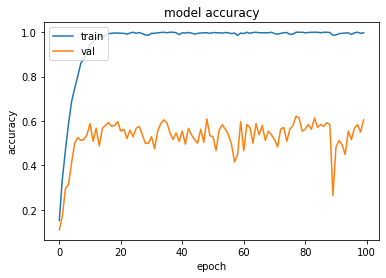

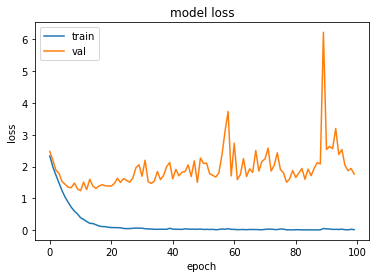

In [6]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [7]:
stopping = tf.keras.callbacks.EarlyStopping(
        monitor="val_accuracy",
        min_delta=0,
        patience=10,
        verbose=0,
        mode="auto",
        baseline=None,
        restore_best_weights=False,
    )

checkpoint = tf.keras.callbacks.ModelCheckpoint(
        "best_model",
        monitor="val_accuracy",
        mode="max",
        save_best_only=True,
        save_weights_only=True,
    )

In [8]:
start_2 = timer()

base_model_2 = tf.keras.applications.ResNet50(weights=None, input_shape=(32, 32, 3), classes=10)

inputs_2 = tf.keras.Input(shape=(32, 32, 3))
x_2 = tf.keras.applications.resnet.preprocess_input(inputs_2)
x_2 = base_model_2(x_2)
model_2 = tf.keras.Model(inputs_2, x_2)

model_2.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
        loss=tf.keras.losses.CategoricalCrossentropy(),#from_logits=True),
        metrics=["accuracy"]
    )
 
loss_0, acc_0 = model_2.evaluate(valid)
print(f"loss {loss_0}, acc {acc_0}")
    

history_2 = model_2.fit(
        train,
        validation_data=valid,
        epochs=100,
        callbacks=[stopping, checkpoint]
)

model_2.load_weights("best_model")

loss, acc = model_2.evaluate(valid)
print(f"final loss {loss}, final acc {acc}")

test_loss, test_acc = model_2.evaluate(test)
print(f"test loss {test_loss}, test acc {test_acc}")
    
end_2 = timer()
print("Time taken = " + str(end_2 - start_2) + ' s')

30/30 [==============================] - 5s 82ms/step - loss: 7.6003 - accuracy: 0.1050
loss 7.6003313064575195, acc 0.10504201799631119
Epoch 1/100
103/103 [==============================] - 43s 346ms/step - loss: 3.4310 - accuracy: 0.1034 - val_loss: 2.3658 - val_accuracy: 0.1050
Epoch 2/100
103/103 [==============================] - 36s 343ms/step - loss: 3.1724 - accuracy: 0.1217 - val_loss: 2.4768 - val_accuracy: 0.0882
Epoch 3/100
103/103 [==============================] - 36s 345ms/step - loss: 3.0720 - accuracy: 0.1265 - val_loss: 2.5417 - val_accuracy: 0.1303
Epoch 4/100
103/103 [==============================] - 36s 349ms/step - loss: 3.0125 - accuracy: 0.1460 - val_loss: 2.7557 - val_accuracy: 0.1008
Epoch 5/100
103/103 [==============================] - 36s 346ms/step - loss: 2.9446 - accuracy: 0.1496 - val_loss: 3.2208 - val_accuracy: 0.1303
Epoch 6/100
103/103 [==============================] - 36s 351ms/step - loss: 3.0381 - accuracy: 0.1144 - val_loss: 3.0229 - val_accu

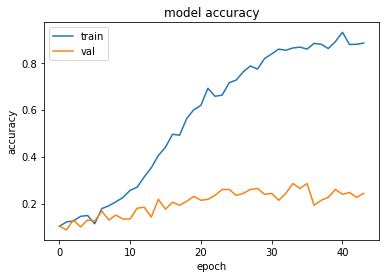

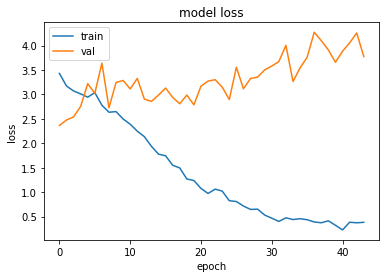

In [9]:
# summarize history for accuracy
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [10]:
start_3 = timer()

model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
    
])

model_3.compile(
        optimizer=tf.keras.optimizers.Adam(lr=0.0001),
        loss=tf.keras.losses.CategoricalCrossentropy(),
        metrics=["accuracy"]
    )

history_3 = model_3.fit(
        train,
        validation_data=valid,
        epochs=100,
        callbacks=[stopping, checkpoint]
    )

model_3.load_weights("best_model")

loss, acc = model_3.evaluate(valid)
print(f"final loss {loss}, final acc {acc}")

test_loss, test_acc = model_3.evaluate(test)
print(f"test loss {test_loss}, test acc {test_acc}")

end_3 = timer()
print("Time taken = " + str(end_3 - start_3) + ' s')

Epoch 1/100
103/103 [==============================] - 6s 47ms/step - loss: 11.1384 - accuracy: 0.0961 - val_loss: 5.4603 - val_accuracy: 0.1092
Epoch 2/100
103/103 [==============================] - 5s 43ms/step - loss: 4.4806 - accuracy: 0.1655 - val_loss: 3.7842 - val_accuracy: 0.1513
Epoch 3/100
103/103 [==============================] - 5s 45ms/step - loss: 3.5202 - accuracy: 0.2117 - val_loss: 3.7842 - val_accuracy: 0.1807
Epoch 4/100
103/103 [==============================] - 5s 42ms/step - loss: 2.9703 - accuracy: 0.2749 - val_loss: 3.2579 - val_accuracy: 0.2227
Epoch 5/100
103/103 [==============================] - 5s 42ms/step - loss: 2.8027 - accuracy: 0.3041 - val_loss: 3.2839 - val_accuracy: 0.2101
Epoch 6/100
103/103 [==============================] - 5s 43ms/step - loss: 2.3928 - accuracy: 0.3370 - val_loss: 2.9676 - val_accuracy: 0.2731
Epoch 7/100
103/103 [==============================] - 5s 48ms/step - loss: 1.9775 - accuracy: 0.4088 - val_loss: 2.8731 - val_accuracy

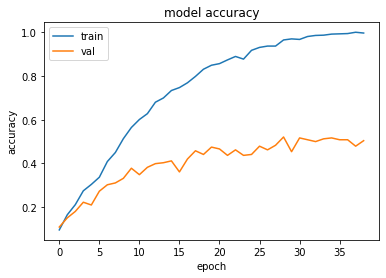

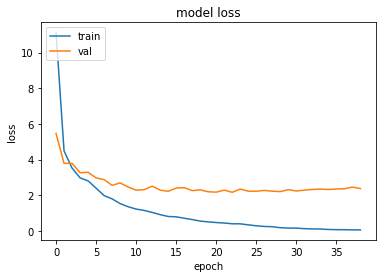

In [11]:
# summarize history for accuracy
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()